# **Powering the Future: A Time series Analysis of US Electricity and Gas Production (1985-2018)**

# **Abstract**
This study delves into historical trends and patterns of electricity and gas utilities production in the United States from 1985 to 2018. Leveraging a comprehensive dataset obtained from Kaggle, encompassing monthly industrial production figures, the analysis utilizes time series analysis techniques to explore long-term production trends, seasonal variations, and potential influencing factors within the sector. These techniques may include methods like ARIMA, SARIMA.
By employing these techniques, this data-driven exploration aims to uncover valuable insights into the evolution of the U.S. energy landscape. The findings will contribute to a better understanding of energy generation and consumption dynamics over a 34-year period, informing future considerations regarding energy production and management strategies.

#**Introduction**
Energy is the lifeblood of our society, powering our homes, industries, and transportation. Understanding how much electricity and gas are produced over time is crucial for effective energy planning and policymaking. This project delves into this very question by exploring a rich dataset spanning 34 years (1985-2018) of electricity and gas utilities production in the United States.

The data, sourced from Kaggle: https://www.kaggle.com/datasets/shenba/electricity-production, a popular platform for data analysis, offers a unique opportunity to track trends and patterns in energy production across decades. By analyzing this data, we can gain valuable insights into how the US has generated and consumed electricity and gas over time. This information can be used to answer important questions such as:


*   Has electricity or gas production increased or decreased in recent decades?
*  Are there seasonal fluctuations in production?

*   How might these trends relate to factors like population growth or technological advancements?

By exploring these questions, we can gain a deeper understanding of the US energy landscape and its potential future directions. This knowledge can be valuable for policymakers, industry leaders, and anyone interested in the future of energy production in the United States.

**The Dataset Overview:**


*   Spanning a duration of 34 years, from 1985 to 2018, the dataset allows for the analysis of long-term trends and patterns in electricity and gas utilities production.
*   The dataset is structured with monthly observations, offering detailed insights into production output for each month of the year across the entire time span.


*   Each observation provides a detailed breakdown of production output for electricity and gas utilities, facilitating the analysis of monthly fluctuations and trends in industrial activity within the sector.










In [ ]:
install.packages('TSA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’




In [ ]:
library('TSA')



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




# **Read The dataset and exploring its structure**

In [ ]:
#read the csv file that contains the dataset
electric_data= read.csv("/content/Electric_Production.csv", header=T)
str(electric_data)


'data.frame':	397 obs. of  2 variables:
 $ DATE      : chr  "1/1/1985" "2/1/1985" "3/1/1985" "4/1/1985" ...
 $ IPG2211A2N: num  72.5 70.7 62.5 57.5 55.3 ...


# **Spliting the data into train and test sets**

In [ ]:

# Split the dataset into training and test sets
set.seed(123)  # Set seed for reproducibility
train_proportion <- 0.8
n <- nrow(electric_data)  # Number of rows in the dataset
train_size <- round(train_proportion * n)  # Number of rows for training set
train_indices <- sample(1:n, train_size, replace = FALSE)  # Randomly sample row indices for training set
train_data <- electric_data[train_indices, ]  # Training set
test_data <- electric_data[-train_indices, ]  # Test set

# Check the dimensions of the training and test sets
dim(train_data)
dim(test_data)
str(train_data)
str(test_data)

[1] 318   2

[1] 79  2

'data.frame':	318 obs. of  2 variables:
 $ DATE      : chr  "11/1/1999" "2/1/1986" "3/1/2001" "6/1/2010" ...
 $ IPG2211A2N: num  82.2 68 92.8 104.4 71.3 ...
'data.frame':	79 obs. of  2 variables:
 $ DATE      : chr  "1/1/1985" "3/1/1985" "6/1/1985" "3/1/1986" ...
 $ IPG2211A2N: num  72.5 62.5 58.1 62.2 55.8 ...


# **Converting the data into a time series Object**
we will convert both the train set and test set into a time series object .

In [ ]:
# Convert the "DATE" column to Date format
train_data$DATE = as.Date(train_data$DATE, format = "%m/%d/%Y")
test_data$DATE = as.Date(test_data$DATE, format = "%m/%d/%Y")

In [ ]:
 #Convert the data into a ts object, specifying the time index
train_ts <- ts(train_data$IPG2211A2N, start = c(min(train_data$DATE), 1), frequency = 12)
test_ts <- ts(test_data$IPG2211A2N, start = c(min(test_data$DATE), 1), frequency = 12)
print(train_ts)


          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
5510  82.2025  67.9869  92.8283 104.3538  71.2661  89.3585 113.7226  86.4776
5511  77.5081  87.5093  82.5465 114.8505 113.4732  76.6826 108.5497  87.5566
5512 102.3930  74.8448  73.5743  72.9816  99.7033 109.8601  81.0740  70.0669
5513 100.1209  86.9356 120.2696 104.4682  80.0924 110.1807 104.4202  73.0610
5514  93.1896  97.2853 101.0396  97.2387 114.8331  61.4065  99.4901  89.3583
5515  90.3738 101.7948  80.1643  70.2928  86.5549 105.7263  85.2351  93.6137
5516  98.9565 112.9014 108.2353  67.1784  73.8152  97.8529  90.9979  96.7431
5517  96.0740  76.6140  88.4519  85.2855  87.5414  77.2214  73.3523  77.5573
5518  85.9841 101.6293  87.8431 101.5316  86.7233 111.9646  90.9944  69.3844
5519  98.4017  76.7521  82.0448  55.3151 114.1036 103.9086  99.2809  74.0301
5520  86.5047  73.8631  68.8162  72.5166  81.4425 100.4386  82.9150  90.0222
5521  93.5310  65.1081  57.5322  87.2248  67.1097  79.4894  58.0005  90.0698

In [ ]:
# Check the class of train_ts and test_ts
class(train_ts)
class(test_ts)

[1] "ts"

[1] "ts"

In [ ]:
 #Summary statistics
summary(train_ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  55.32   77.29   90.32   89.29  101.02  124.25 

The summary statistics  provides a concise overview of the distribution of the
 train data :


*   Minimum (Min): The lowest value dataset is 55.32.This represents the lowest observed production level during the specified time period.

*   First Quartile (1st Qu.): The first quartile (25th percentile) is 77.29. It indicates that 25% of the data falls below this value.


*   Median: the median production level is 90.32 . It divides your data into two equal halves.
*   Mean: The mean production level is 89.29.It provides an overall measure of central tendency.


*   Third Quartile (3rd Qu.): The third quartile (75th percentile) is 101.02.It represents the value below which 75% of the data .
*   Maximum (Max):The maximum value in your dataset is 124.25. This represents the highest observed production level.








# **Ploting the data**

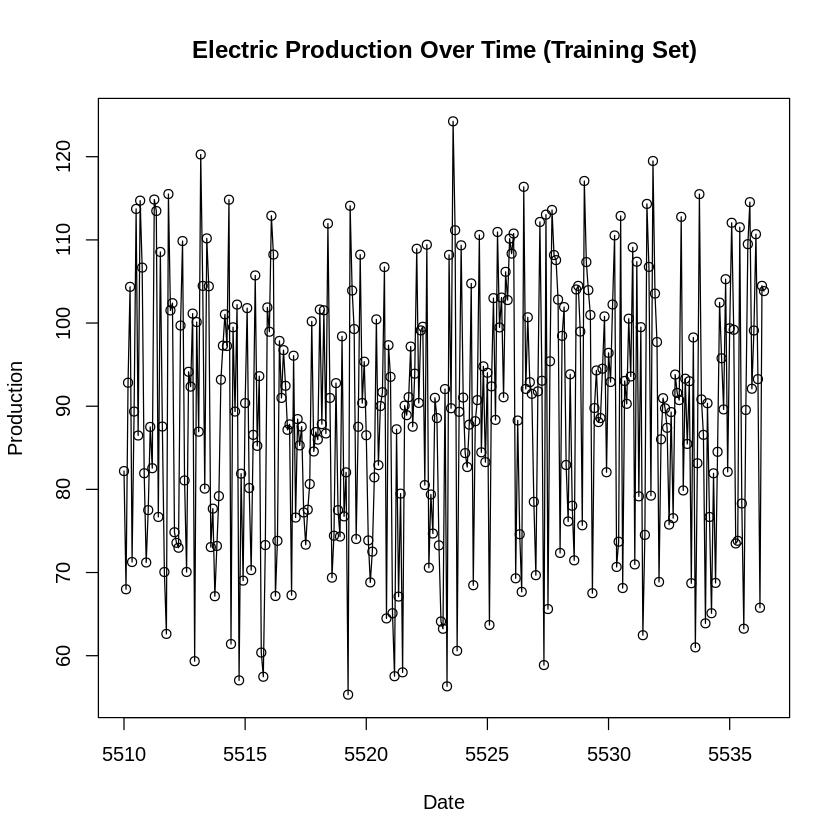

In [ ]:
# Time series plot
plot(train_ts,
     main = "Electric Production Over Time (Training Set)",
     xlab = "Date",
     ylab = "Production",
     type = "o",
     col = "black")


# **The analysis of the scatter plot:**

The plot of the training set electric production time series shows electric production over a period, likely several years, but the exact timeframe isn't displayed on the x-axis. The data points are plotted monthly (frequency = 12).There appears to be a possible upward trend in electric production. This suggests that production has been increasing steadily over the period shown. There could be several reasons for this, including population growth, a growing reliance on electricity in our daily lives, and an expansion of electricity generation capacity.While it's difficult to say for certain from a single plot, there might be hints of seasonality in the data. Here we might expect to see higher production during the summer months due to increased demand for air conditioning and lower production in the winter months.
   

# **Checking The stationarity**
we will use here the Dickey-Fuller test in the training set where we will use the ADF test.

In [ ]:
install.packages("stats")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [ ]:
library(tseries)
adf.test(train_ts)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(train_ts):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  train_ts
Dickey-Fuller = -7.5022, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


# **Discussion of the results:**
**Test Statistic:**
The Dickey-Fuller test statistic is -7.5022. A more negative value indicates stronger evidence against a unit root (non-stationarity), suggesting that the data is more likely to be stationary.


**Lag Order:**

The test was performed with a lag order of 6. This means that the test model included 6 lagged terms of the time series to account for any potential autocorrelation.

**p-value:**

The p-value is 0.01. This value represents the probability of observing a test statistic as extreme as -7.5022 if the null hypothesis (non-stationarity) were true. A p-value of 0.01 is very low, indicating strong evidence against the null hypothesis.
So Based on the test statistic of -7.5022 and a p-value of 0.01, we can reject the null hypothesis of non-stationarity at a significance level of 1%. This suggests that the electric production time series data is likely stationary.

# **Other test for the stationarity:  KPSS test**

In [ ]:
install.packages("urca")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(urca)

kpss_test <- kpss.test(train_ts)
kpss_test$p.value
summary(kpss_test)

Warning message in kpss.test(train_ts):
“p-value greater than printed p-value”


[1] 0.1

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character

# **Discussion of the result of  KPSS test**
The p-value is 0.1, which is higher than most common significance levels (0.05 or 0.1). This means that we fail to reject the null hypothesis of stationarity at these significance levels.
Therefore ,This finding aligns with the ADF test we previously performed, which also indicated stationarity. This strengthens the evidence that the electric production time series data is likely stationary.
And for more confirmation we will plot the acf of the train set .


# **The ACF plot for the training data**
The x-axis represents the lag, which is the time difference between electricity production measurements. The y-axis represents the autocorrelation coefficient, which measures how correlated the production is with itself at different time lags. A value of 1 indicates a perfect positive correlation, 0 indicates no correlation and -1 indicates a perfect negative correlation. The horizontal lines around 0 represent the confidence intervals, which show the range of values where the correlation might be due to random chance.

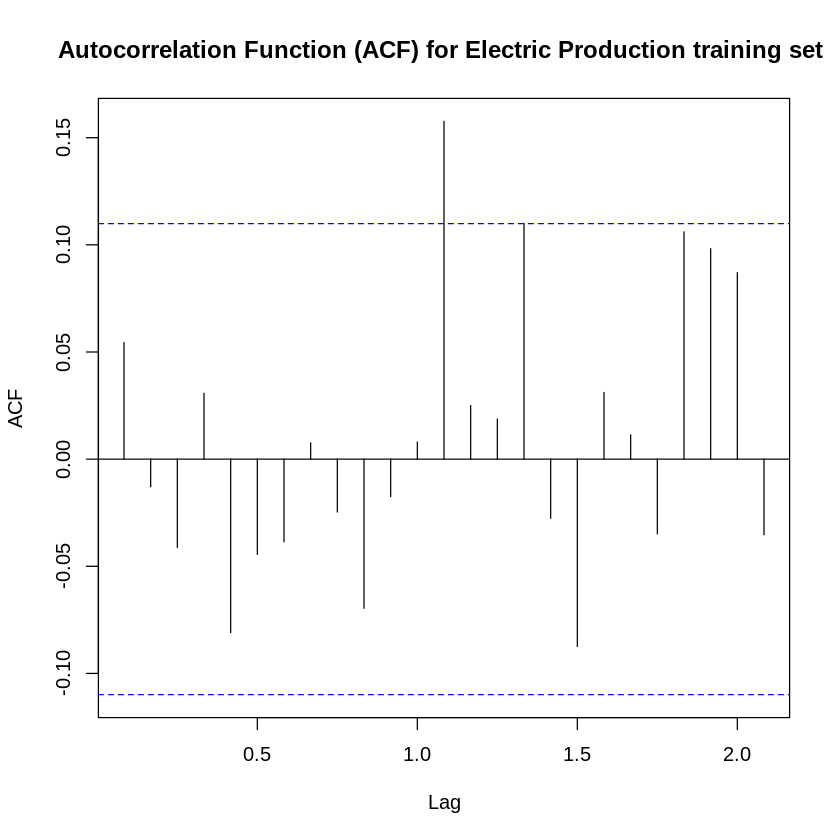

In [ ]:
# Autocorrelation Function (ACF) plot

acf(train_ts, main = "Autocorrelation Function (ACF) for Electric Production training set ")

In the ACF plot the values on the plot gradually decrease in magnitude (either positive or negative) as the lag increases.suggesting that there is no significant serial dependence in the data at longer lags.


In [ ]:
library(tseries)
adf.test(diff(train_ts))

Warning message in adf.test(diff(train_ts)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(train_ts)
Dickey-Fuller = -11.523, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
library(urca)

kpss_test <- kpss.test(diff(train_ts))
kpss_test$p.value
summary(kpss_test)

Warning message in kpss.test(diff(train_ts)):
“p-value greater than printed p-value”


[1] 0.1

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character

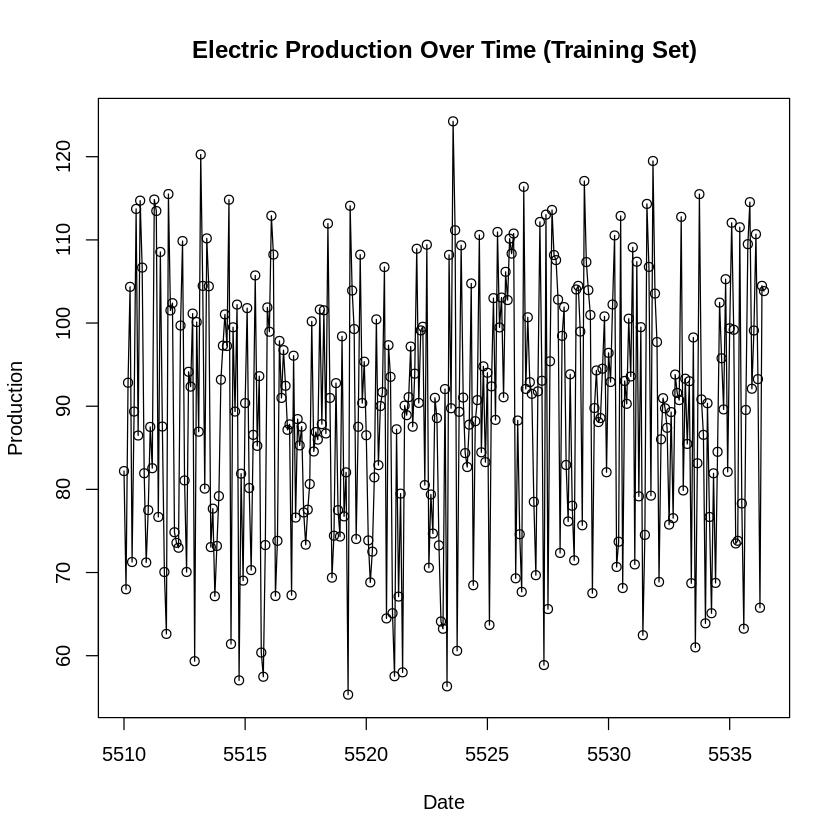

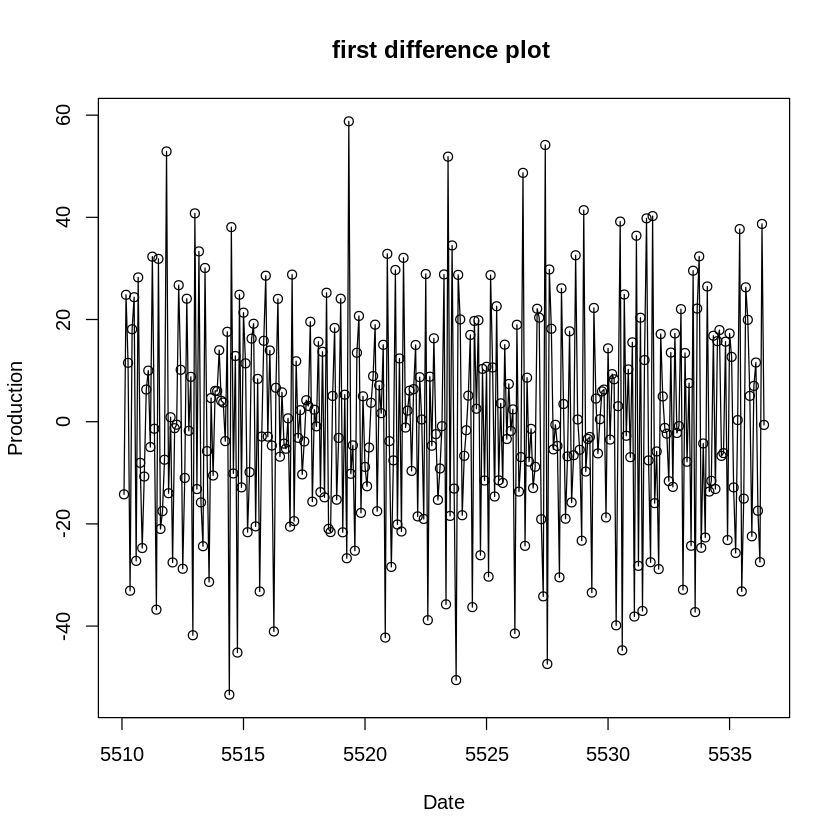

In [ ]:
# Time series plot
plot(train_ts,
     main = "Electric Production Over Time (Training Set)",
     xlab = "Date",
     ylab = "Production",
     type = "o",
     col = "black")
# first difference plot
plot(diff(train_ts),
     main = "first difference plot ",
     xlab = "Date",
     ylab = "Production",
     type = "o",
     col = "black")


# **Time Series Decomposition**

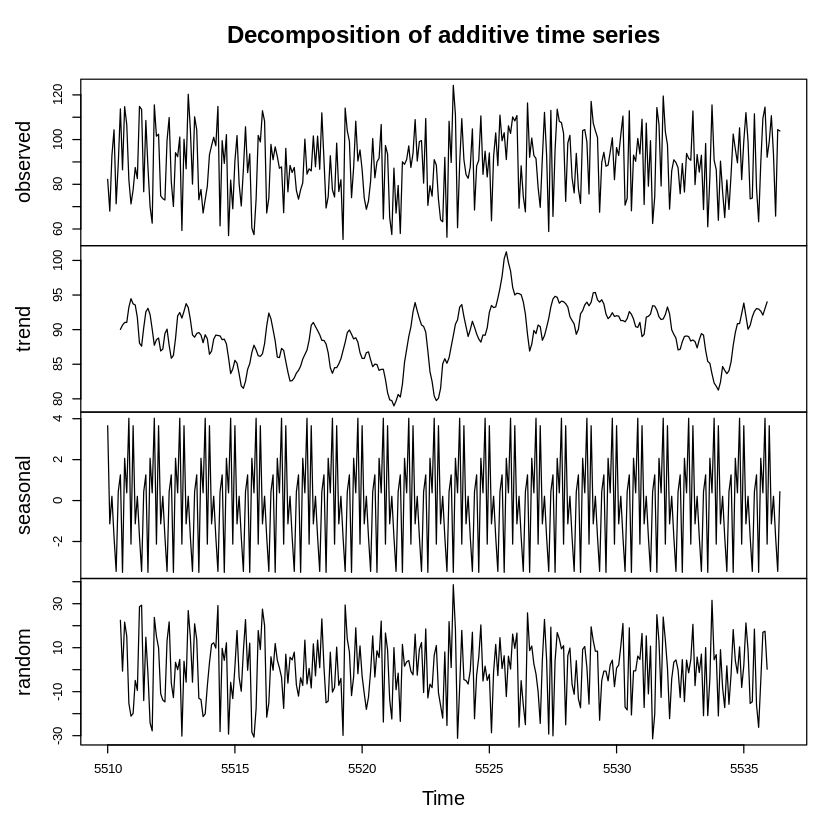

In [ ]:
# Time series decomposition
decomposition_result = decompose(train_ts, type = "additive")
plot(decomposition_result)

# **Time Series Decomposition Analysis:**


1.   Observed Component: The observed component represents the actual data points (production levels) over time.It shows a fluctuating pattern.
2.   Trend Component:The trend component captures the long-term movement or overall direction of the data we observe that  it appears as a gradual upward slope.

3.   Seasonal Component: The seasonal component reveals consistent, repetitive fluctuations that occur within a specific time frame.We observe the seasonal component seems to exhibit a cyclical pattern, potentially indicating a yearly seasonality.
4.   
Random (Residual) Component:captures irregularities not accounted for by the trend or seasonal patterns, we observe some sudden jumps.These could indicate anomalies or unexpected events affecting production






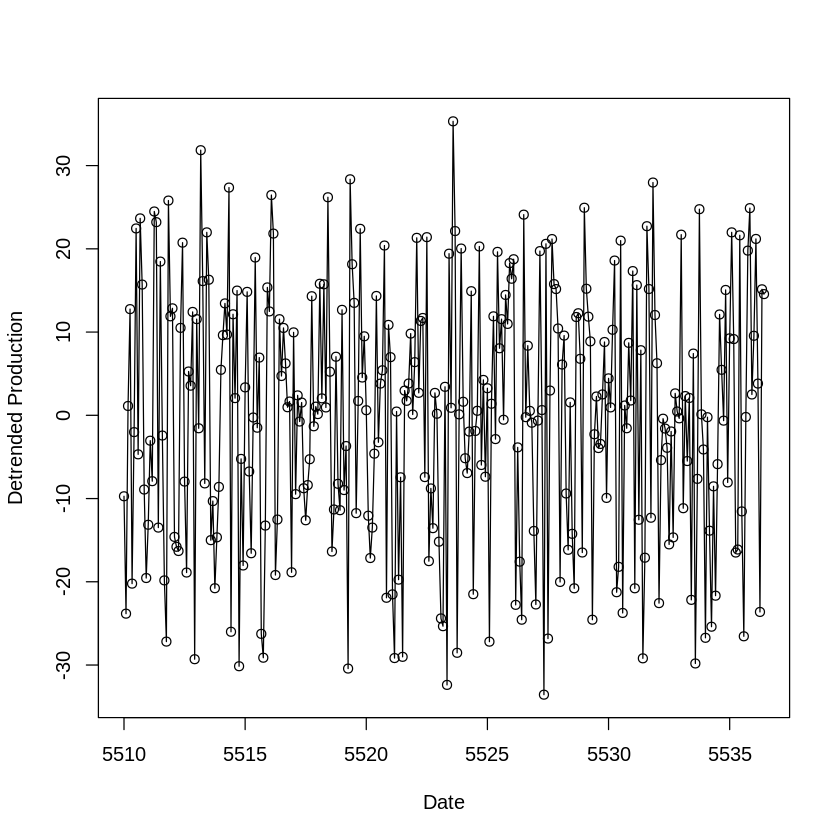

In [ ]:
# Extracting trend component using loess
trend_component = predict(loess(train_ts ~ time(train_ts)))
# Subtract the trend component from the original time series to detrend the data
detrended_data = train_ts - trend_component
# Plot the detrended data
plot(detrended_data, ylab = "Detrended Production", xlab = "Date", type = "o")

# **Discussion**

The decomposition confirms the presence of an upward trend and a seasonal component in your electric production data. This aligns with the observations from the time series plot. The seasonal component suggests that the production might be higher during specific times of the year (e.g., summer months due to air conditioning usage) and lower during others.
Therefore based on all these observations we will use the ARIMA and SARIMA models to fit the data because :
we see that ARIMA model can account for the upward trend we see in the decomposition plot. while the SARIMA model can capture both the trend and seasonality in your data.

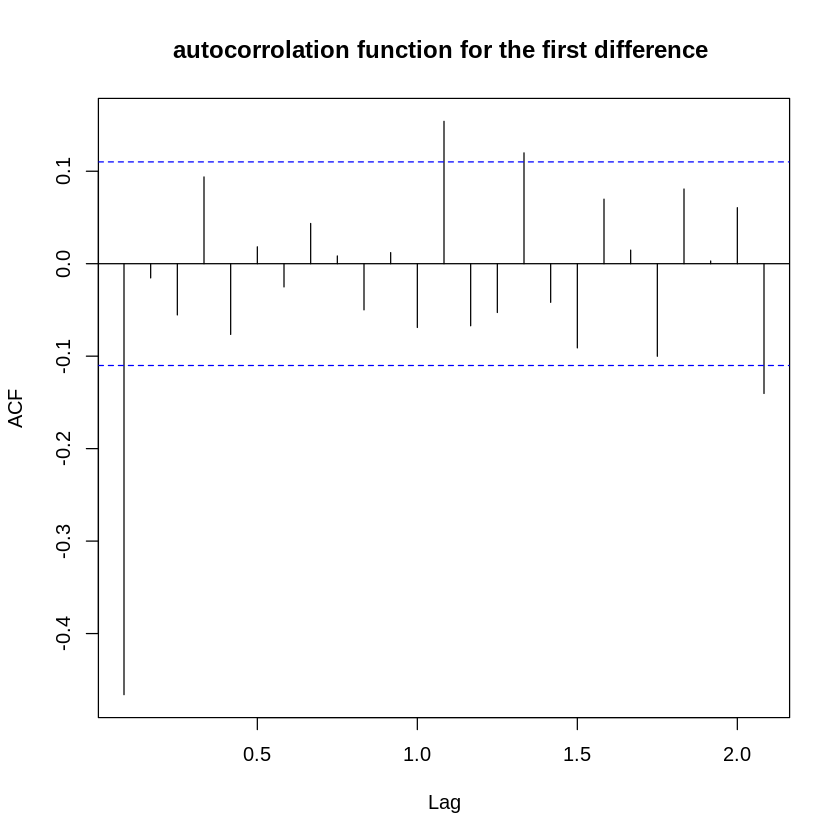

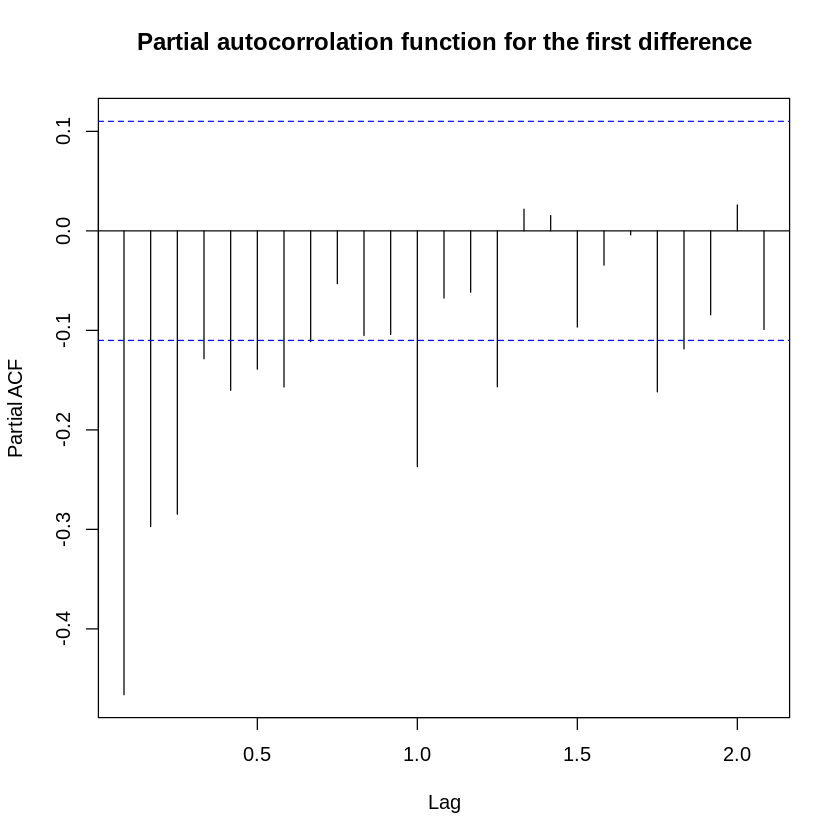

In [ ]:
diff_train_ts= diff(train_ts)
acf(diff_train_ts,main="autocorrolation function for the first difference ")
pacf(diff_train_ts,main="Partial autocorrolation function for the first difference")

# **Discussion**


*   The ACF plot shows a significant spike at lag 1 and then gradually trails off within the confidence interval around zero. This suggests some short-term dependence in the differenced data, likely meaning an AR (autoregressive) term might be needed in the ARIMA model.
*   The PACF plot also shows a significant spike at lag 1 and then cuts off within the confidence interval. This reinforces the idea of an AR term but suggests it might be of order 1 (AR(1)). There are no significant spikes at higher lags in the PACF, indicating an MA (moving average) term might not be necessary.





# **Model specification**
In this section we will select the condidate ARIMA models that may be the best models to fit the data we will use Akaike’s Information Criterion (AIC) and Bayesian Information Criterion (BIC).

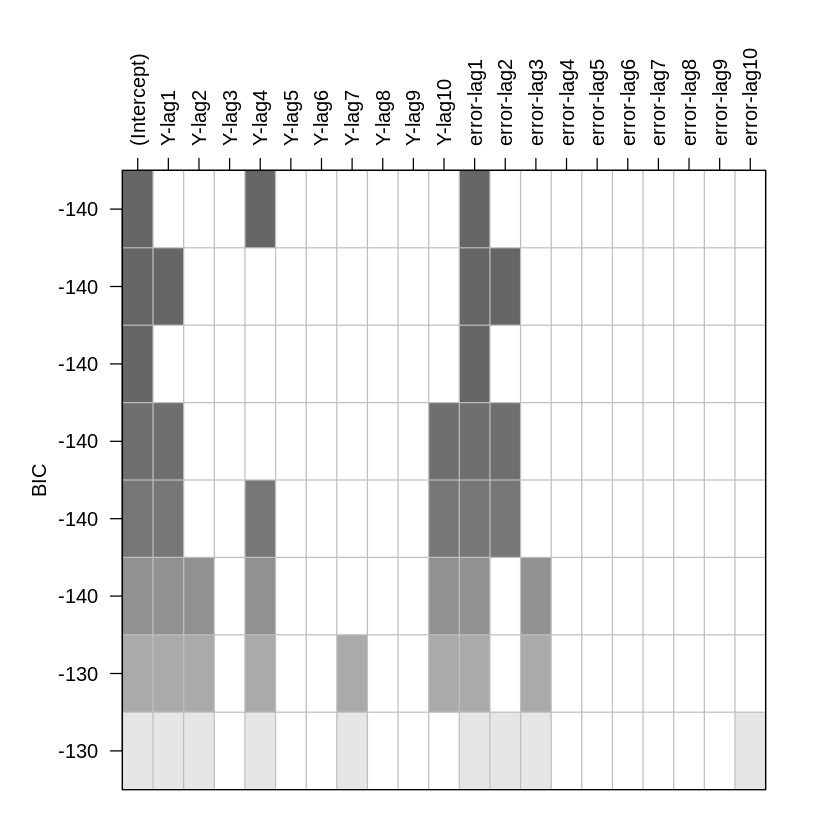

In [ ]:
plot(armasubsets(diff(train_ts),10,10))

# **Discussion of the plot:**
we have observed :    
There are several subplots with relatively low AIC values spread across the grid. This indicates that multiple ARIMA models could potentially fit the data well, and there's no single most prominent candidate.
Some subplots in the lower left corner have slightly darker colors compared to other areas. This suggests that ARIMA models with low AR terms (1-3) and potentially a low MA term (1-2) might be worth exploring further.
therefore as a condidates we can choose based on the darck colors in the plot the following models :    
ARIMA(1, 1, 1), ARIMA(2, 1, 1), ARIMA(3, 1, 1).


# **Trying ARIMA models and find the best one that fit the data:**

In [ ]:
install.packages('forecast', dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘x13binary’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’




In [ ]:
library(forecast)

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



# **ARIMA Model :ARIMA(1,1,1)**

In [ ]:
arima_model_1 <- arima(diff_train_ts, order = c(1, 1, 1))

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = diff_train_ts, order = c(1, 1, 1))

Coefficients:
          ar1      ma1
      -0.4636  -1.0000
s.e.   0.0497   0.0079

sigma^2 estimated as 347.5:  log likelihood = -1376.19,  aic = 2756.38

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

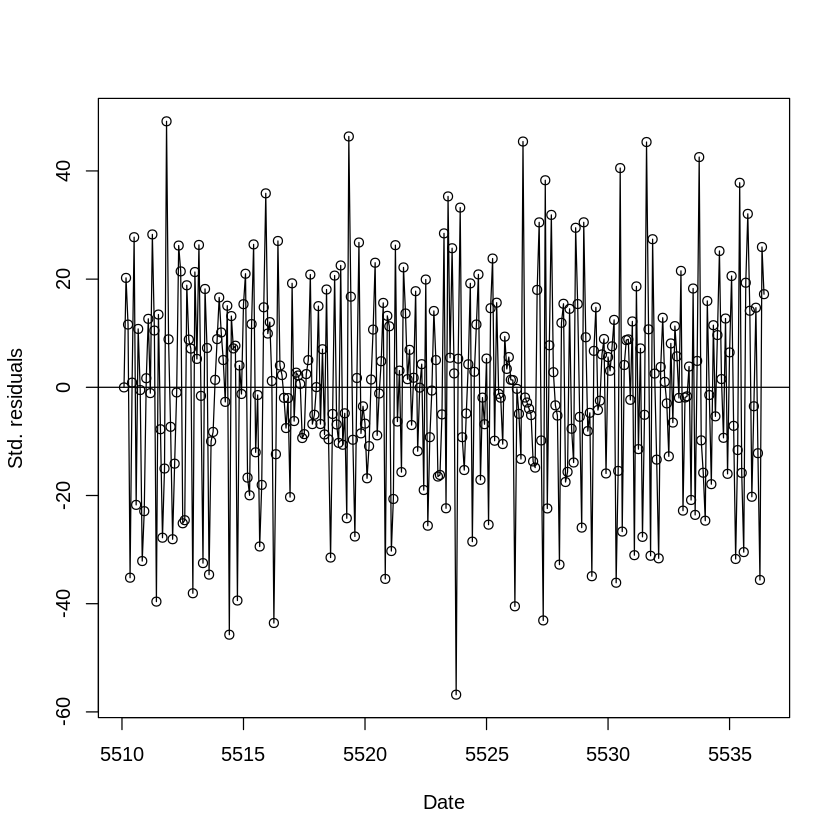

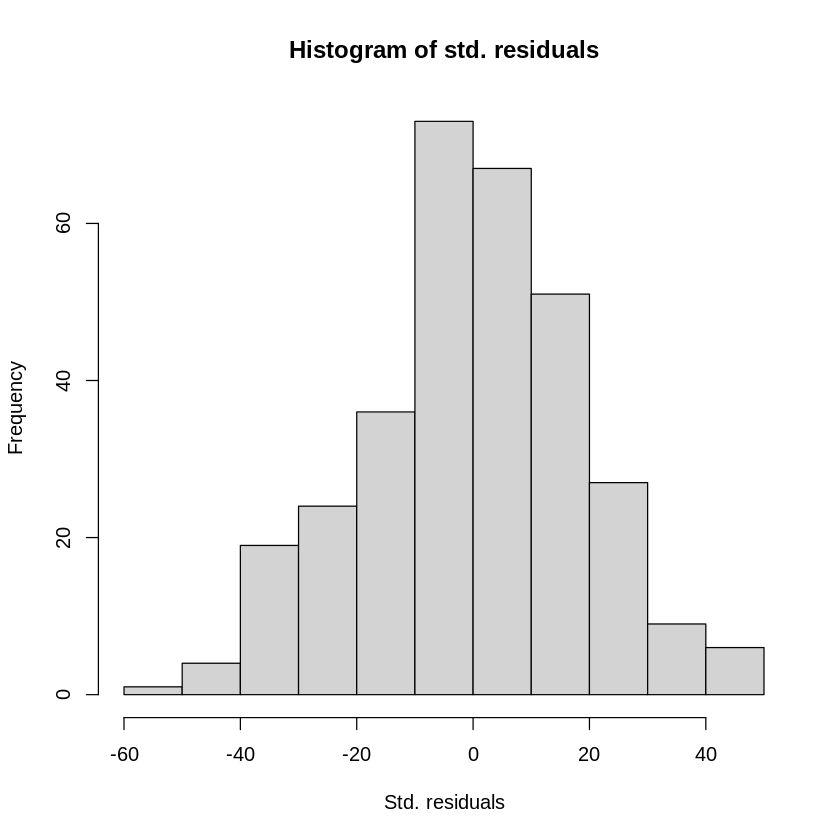


	Shapiro-Wilk normality test

data:  residuals_arima
W = 0.99614, p-value = 0.6361


$pvalue
[1] 0.652

$observed.runs
[1] 164

$expected.runs
[1] 159.4858

$n1
[1] 157

$n2
[1] 160

$k
[1] 0

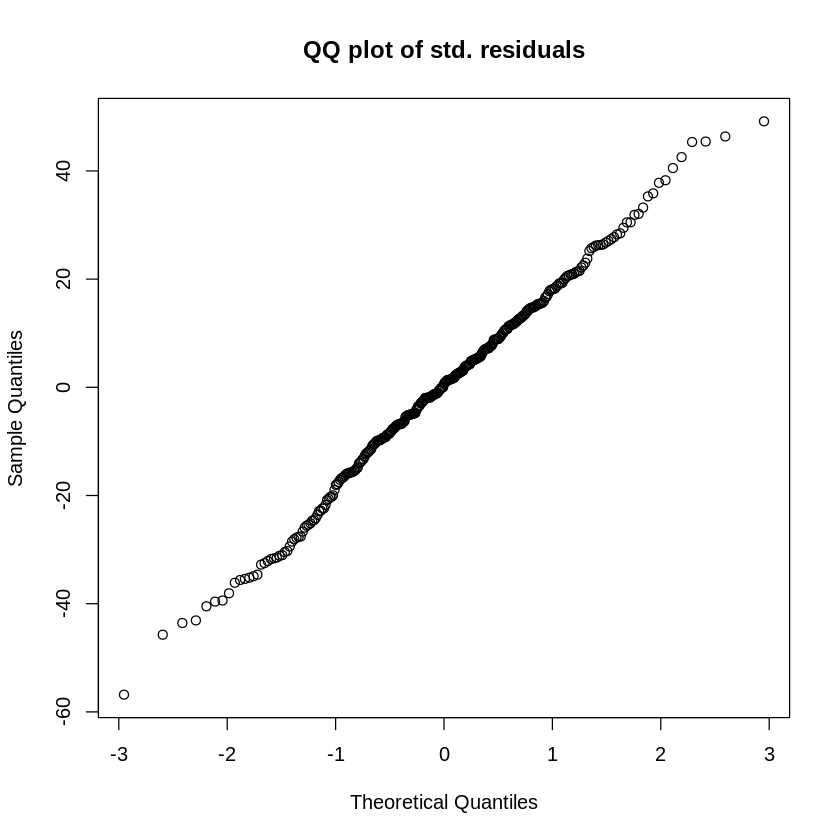

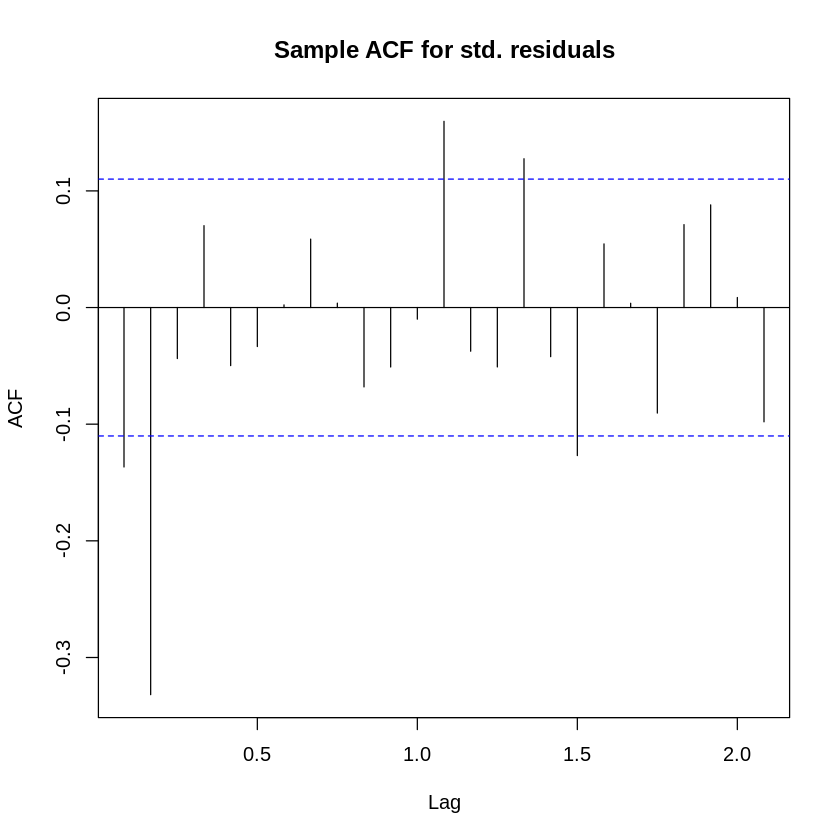

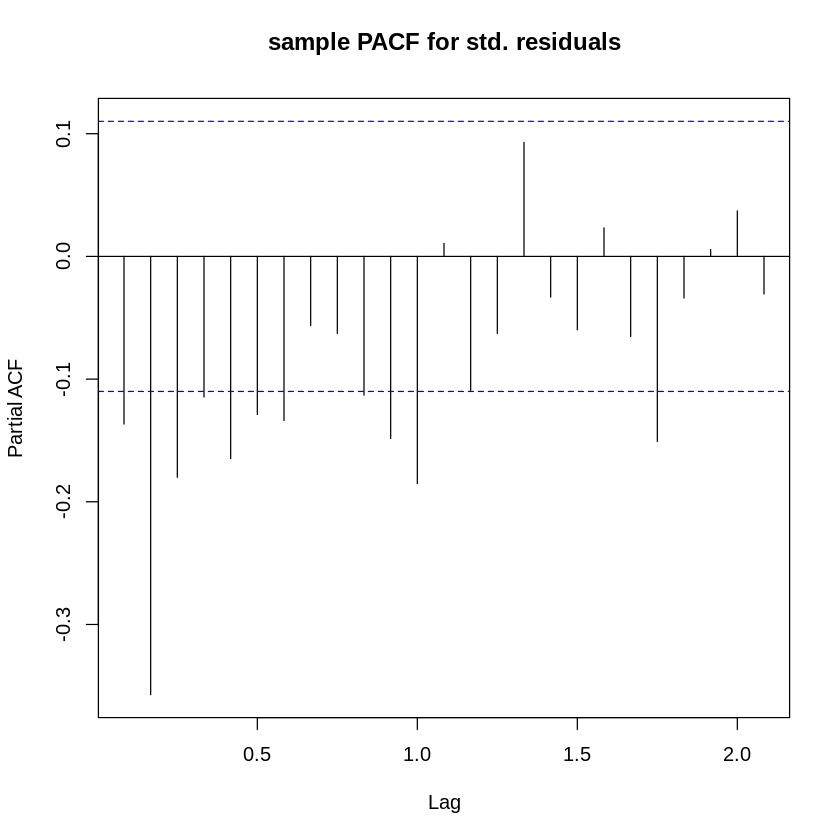

In [ ]:

residuals_arima = residuals(arima_model_1, type = "innovation")
summary(arima_model_1)
# Plot the residuals
plot(residuals_arima, ylab = "Std. residuals", xlab = "Date", type = "o")
abline(h = 0)

# Histogram of residuals
hist(residuals_arima, main = "Histogram of std. residuals", xlab = "Std. residuals")

# QQ plot of residuals
qqnorm(residuals_arima, main = "QQ plot of std. residuals")

# Shapiro-Wilk test for normality
shapiro.test(residuals_arima)

# Runs test for randomness
runs(residuals_arima)

# ACF plot for residuals
acf(residuals_arima, main = "Sample ACF for std. residuals")
# PACF plot for residuals
pacf(residuals_arima,main="sample PACF for std. residuals")


# **Discussion of results:**
**In the summary:**


*  **Coefficients and Standard Errors:** AR(1) Coefficient: -0.4636 (significant with p-value likely < 0.05) and MA(1) Coefficient: -1.0000 (highly significant with p-value likely << 0.05). The negative AR(1) coefficient indicates a dependence on the previous value (lag 1) in the differenced data. This means past values have a negative influence on current values. And the negative and significant MA(1) coefficient implies there's a moving average effect with a weight of -1 on the past error term (residual) at lag 1. This suggests the model incorporates past forecast errors to improve future predictions.


*   **Sigma^2, Log Likelihood, and AIC:** Sigma^2: 347.5 (estimated variance of the white noise error term) And log Likelihood: -1376.19 (lower values indicate a worse fit)And AIC: 2756.38 (model selection criterion, lower values indicate a better balance between fit and complexity) .we will use the AIC to compare this model with other candidate ARIMA models. A lower AIC for the ARIMA(1,1,1) model suggests it might be a better choice in terms of fit and complexity.

**In Shapiro-Wilk Normality Test:**

The Shapiro-Wilk normality test resulted in a high p-value of 0.652. This indicates that we cannot reject the null hypothesis that the residuals are normally distributed.

**In Residual Time Series Plot:**

The residual time series plot shows no clear trends or seasonality, indicating the model captured these patterns in the data. Scattered points around zero suggest the model captured some of the dependence. However, there are a few potential outliers (less than 5% of the data points) that might be worth investigating further to understand their cause and potential impact on the model's performance.

**In ACF Plot of Residuals:**

The Autocorrelation Function (ACF) plot of the standardized residuals from the ARIMA(1,1,1) model reveals no significant spikes beyond lag 0, which falls within the confidence interval. This absence of significant spikes suggests that the model has effectively captured the linear dependence in the differenced data. In other words, there's no remaining linear correlation between the residuals at different time lags. This finding strengthens the model's validity as it indicates that the model has accounted for the essential linear relationships between past errors and current errors in the differenced electric production data.


**In PACF Plot of Residuals:**

The Partial Autocorrelation Function (PACF) plot of the standardized residuals, shown in the figure, aligns with the findings from the ACF plot. There are no significant spikes exceeding the confidence interval (blue shaded area) beyond lag 0. This absence of significant spikes suggests that the ARIMA(1,1,1) model has likely captured any significant linear dependence in the residuals at all lags. Unlike the ACF, which considers the overall correlation at a specific lag, the PACF isolates the correlation at that lag, removing the influence of correlations at previous lags. Therefore, the absence of spikes in the PACF plot strengthens the conclusion that the model has effectively captured the essential linear relationships in the differenced data.

**In The QQ plot :**

The Quantile-Quantile (QQ) plot of the standardized residuals, visualized in the figure, reveals a closeness to a diagonal line, particularly in the central portion. This indicates that the distribution of the residuals somewhat resembles a normal distribution for the majority of the data points. However, there are some deviations from the diagonal line, especially at the tails of the plot. These deviations suggest slight non-normality in the tails of the residual distribution, where the actual data points fall slightly further from the expected quantiles of a normal distribution.While the residuals might not be perfectly normal, the overall closeness to the diagonal line suggests that the non-normality is likely minor. This is further supported by the high p-value obtained from the Shapiro-Wilk normality test.



# **ARIMA Model: ARIMA(2, 1, 1)**

In [ ]:
arima_model_2 <- arima(diff_train_ts, order = c(2, 1, 1))

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = diff_train_ts, order = c(2, 1, 1))

Coefficients:
          ar1      ar2      ma1
      -0.6025  -0.2973  -1.0000
s.e.   0.0538   0.0540   0.0079

sigma^2 estimated as 316.5:  log likelihood = -1361.78,  aic = 2729.55

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

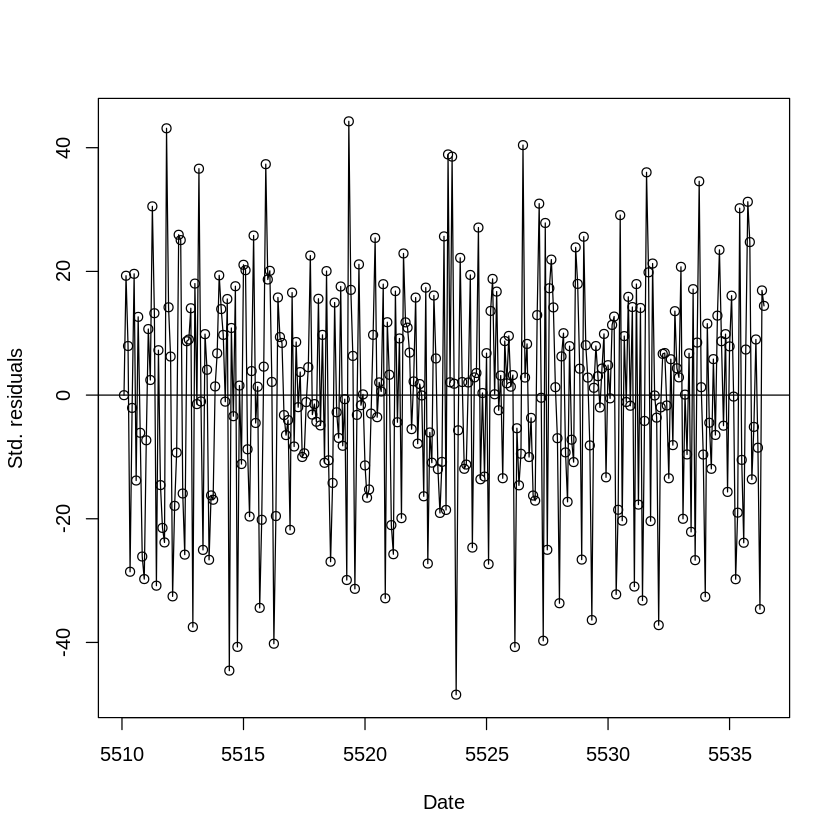

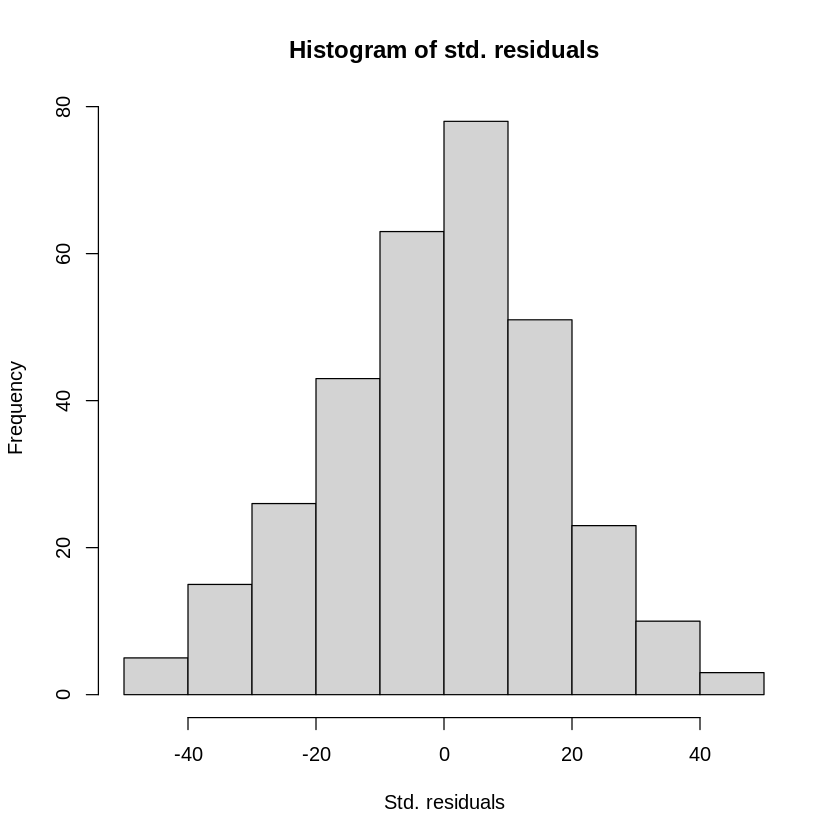


	Shapiro-Wilk normality test

data:  residuals_arima
W = 0.99328, p-value = 0.169


$pvalue
[1] 0.0393

$observed.runs
[1] 178

$expected.runs
[1] 159.2334

$n1
[1] 152

$n2
[1] 165

$k
[1] 0

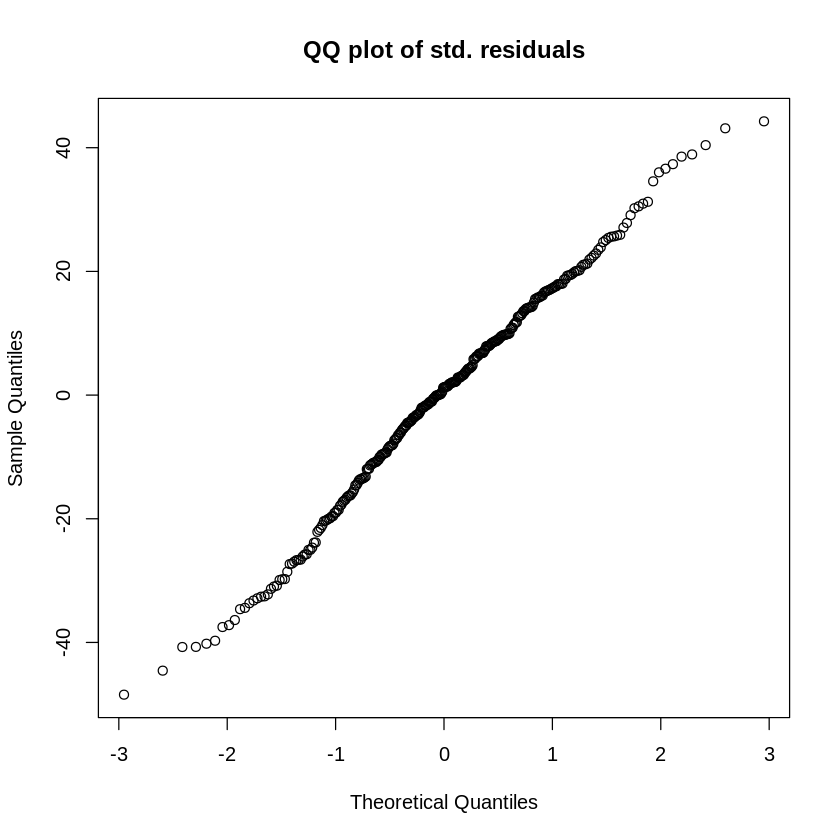

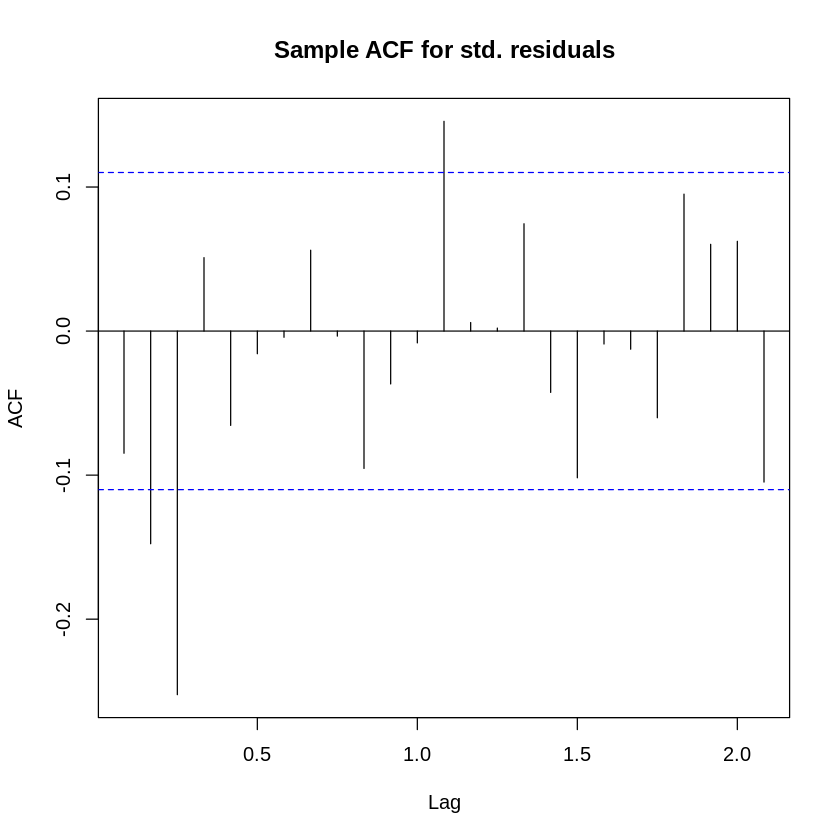

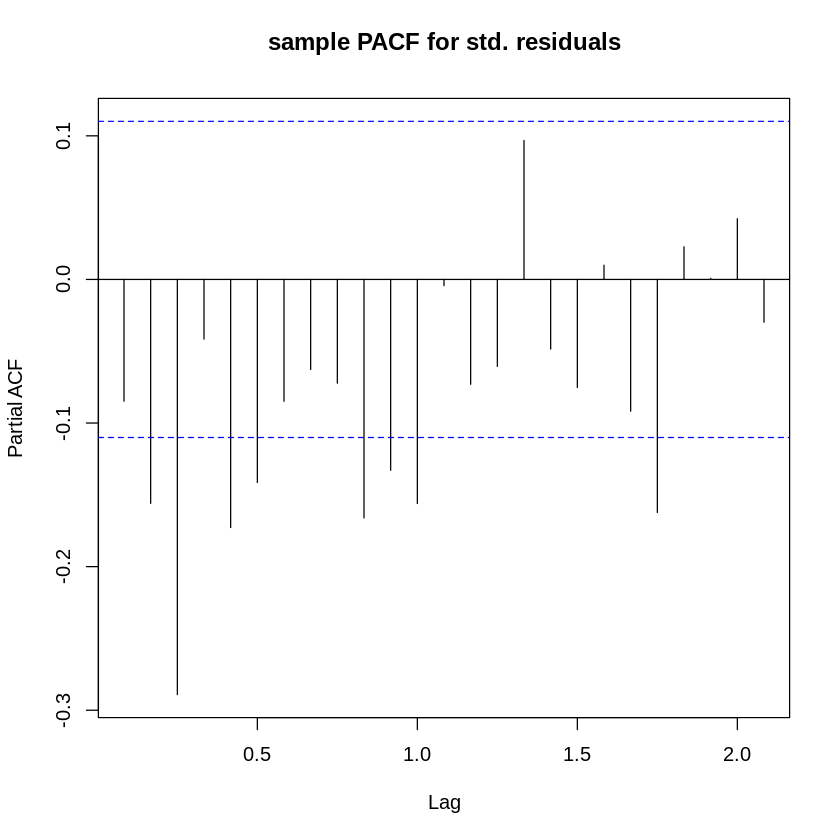

In [ ]:

residuals_arima = residuals(arima_model_2, type = "innovation")
summary(arima_model_2)
# Plot the residuals
plot(residuals_arima, ylab = "Std. residuals", xlab = "Date", type = "o")
abline(h = 0)

# Histogram of residuals
hist(residuals_arima, main = "Histogram of std. residuals", xlab = "Std. residuals")

# QQ plot of residuals
qqnorm(residuals_arima, main = "QQ plot of std. residuals")

# Shapiro-Wilk test for normality
shapiro.test(residuals_arima)

# Runs test for randomness
runs(residuals_arima)

# ACF plot for residuals
acf(residuals_arima, main = "Sample ACF for std. residuals")
# PACF plot for residuals
pacf(residuals_arima,main="sample PACF for std. residuals")


#**Discussion of the results:**
**In the summary:**


* **Coefficients and Standard Errors:** The negative and statistically significant AR(1) and AR(2) coefficients indicate that the current differenced value of electric production Yt is negatively influenced by the values at lags 1 and 2 Yt-1 and Yt-2. In other words, higher production values in the previous two periods are associated with lower production in the current period.
The negative and highly significant MA(1) coefficient suggests that the model incorporates a moving average .


*   **Model Fit Statistics:**
A lower AIC for the ARIMA(2,1,1) model suggests it achieves a better balance between capturing the data structure and model complexity compared to  ARIMA(1,1,1).

**In the Shapiro-Wilk normality test:**

The Shapiro-Wilk normality test on the residuals of the ARIMA(2,1,1) model indicates that the residuals are likely fairly normal. The W statistic (0.99328) is high, close to 1, and the p-value (0.169) is greater than the commonly used significance level of 0.05. This result suggests the residuals are likely normally distributed.

**In the QQ plot :**

The Quantile-Quantile (QQ) plot of the standardized residuals from the ARIMA(2,1,1) model, visualized in the figure, reveals a general closeness to a diagonal line, particularly in the central portion. This indicates that the distribution of the residuals somewhat resembles a normal distribution for a majority of the data points. However, there are some deviations from the diagonal line, particularly in the tails of the plot. These deviations suggest slight non-normality in the tails of the residual distribution, where the actual data points fall slightly further from the expected quantiles of a normal distribution.

**In the ACF plot :**    
Based on the ACF plot, there's no strong evidence of remaining linear dependence in the residuals at lags beyond 2. This is an improvement compared to the ARIMA(1,1,1) model.

**In the PACF plot :**

The partial autocorrelation function (PACF) plot of the standardized residuals from the ARIMA(2,1,1) model reveals encouraging signs for the model's fit. There are no significant spikes beyond lag 1 in the PACF plot. This indicates that the model has likely captured any significant linear dependence in the residuals at all lags. The remaining fluctuations fall within the confidence interval around zero, suggesting somehow the  randomness in the residuals.   





# **ARIMA Model : ARIMA(3,1,1)**

In [ ]:
arima_model_3 <- arima(diff_train_ts, order = c(3, 1, 1))

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = diff_train_ts, order = c(3, 1, 1))

Coefficients:
          ar1      ar2      ar3     ma1
      -0.6878  -0.4709  -0.2852  -1.000
s.e.   0.0540   0.0613   0.0543   0.008

sigma^2 estimated as 290.5:  log likelihood = -1348.58,  aic = 2705.17

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

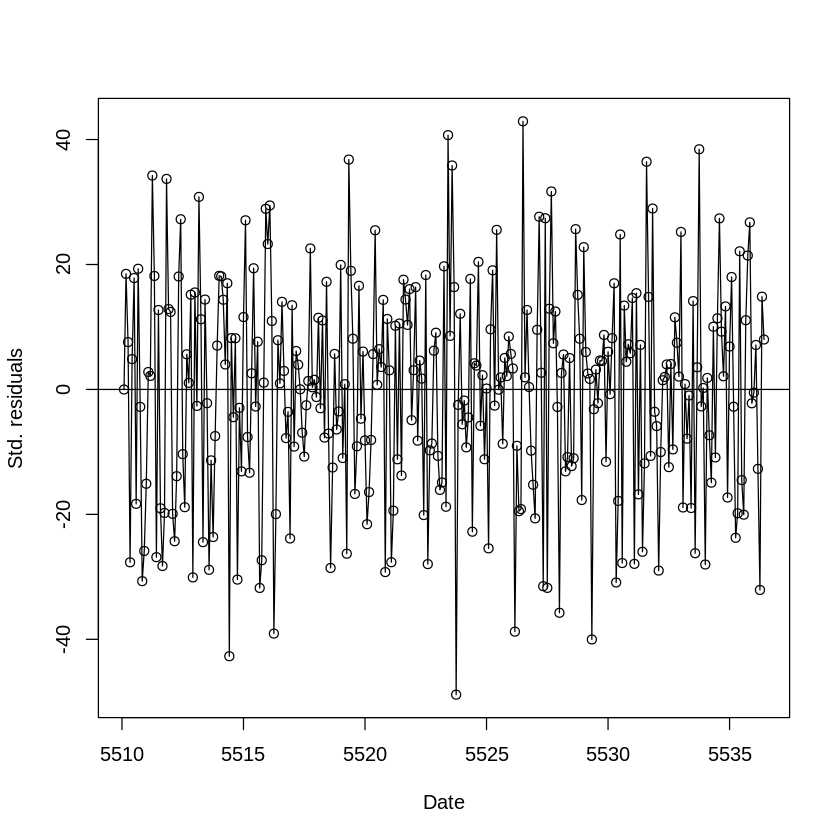

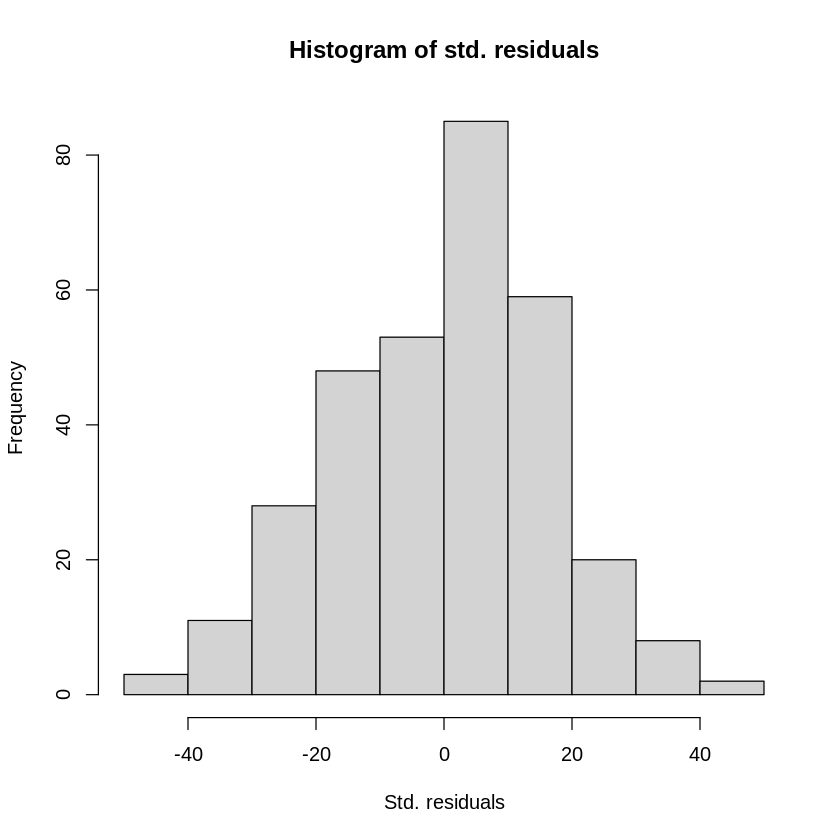


	Shapiro-Wilk normality test

data:  residuals_arima
W = 0.99297, p-value = 0.1434


$pvalue
[1] 0.279

$observed.runs
[1] 168

$expected.runs
[1] 157.9842

$n1
[1] 143

$n2
[1] 174

$k
[1] 0

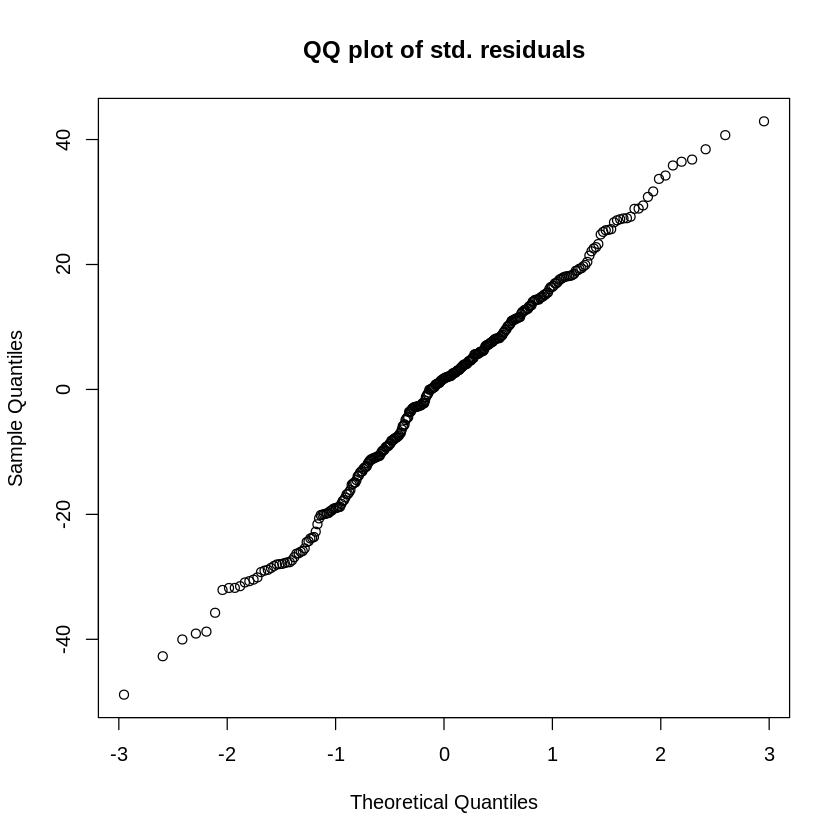

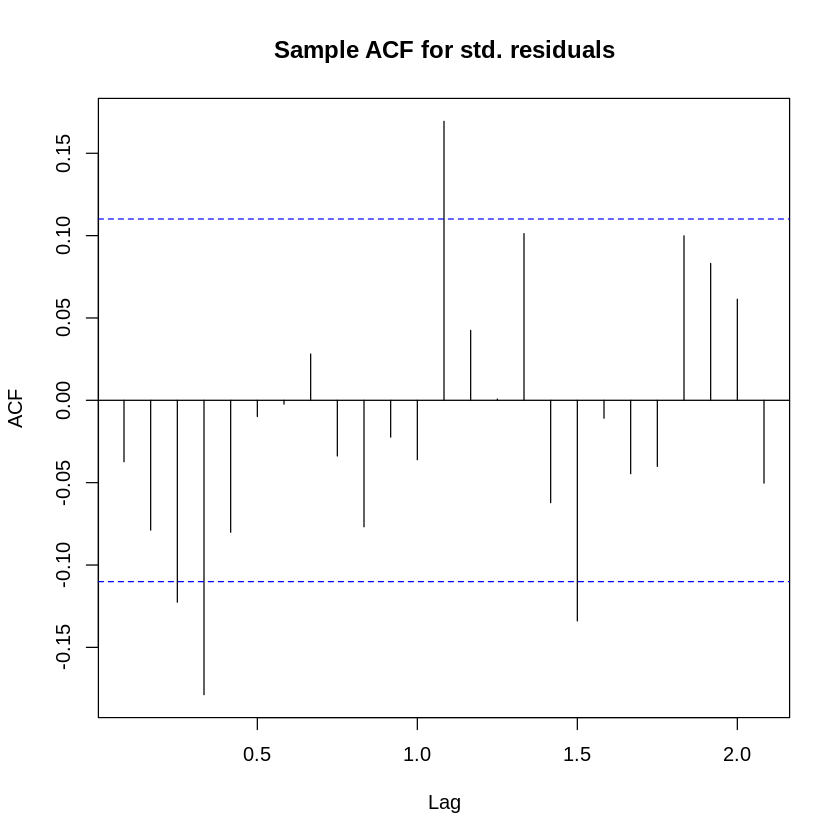

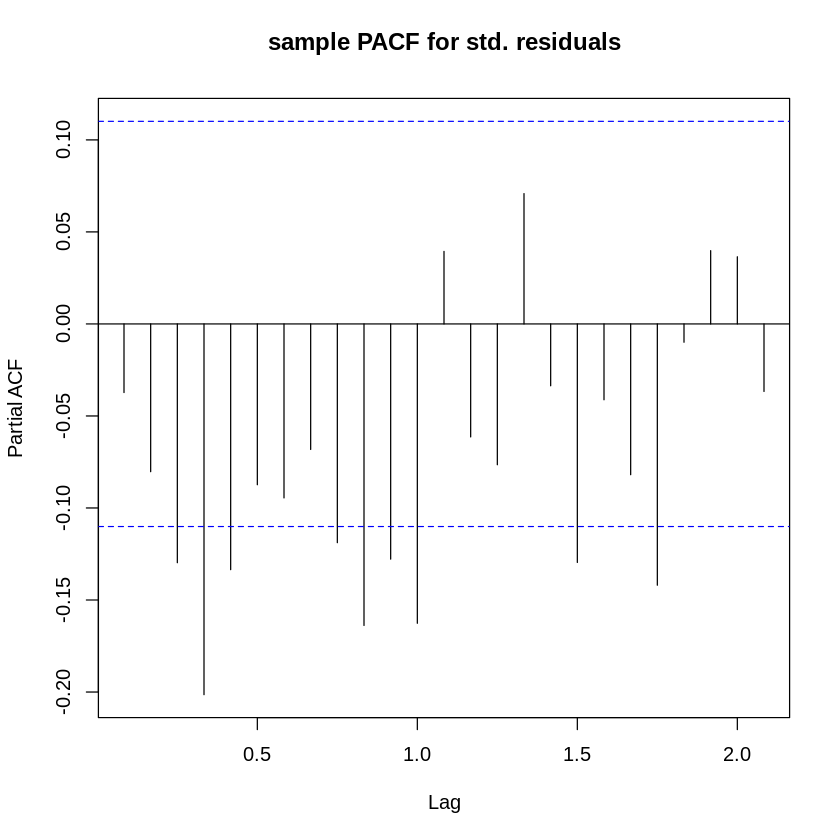

In [ ]:

residuals_arima = residuals(arima_model_3, type = "innovation")
summary(arima_model_3)
# Plot the residuals
plot(residuals_arima, ylab = "Std. residuals", xlab = "Date", type = "o")
abline(h = 0)

# Histogram of residuals
hist(residuals_arima, main = "Histogram of std. residuals", xlab = "Std. residuals")

# QQ plot of residuals
qqnorm(residuals_arima, main = "QQ plot of std. residuals")

# Shapiro-Wilk test for normality
shapiro.test(residuals_arima)

# Runs test for randomness
runs(residuals_arima)

# ACF plot for residuals
acf(residuals_arima, main = "Sample ACF for std. residuals")
# PACF plot for residuals
pacf(residuals_arima,main="sample PACF for std. residuals")


# **Discussion of the results:**

**In the summary :**

*   **Coefficient Analysis:** All coefficients are statistically significant (likely p-value < 0.05) based on the absence of standard error values mentioned as "s.e." This indicates that the current differenced value of electric production (y_t) is influenced by past values at lags 1, 2, and 3 (y_(t-1), y_(t-2), and y_(t-3)) as well as the past error term at lag 1 (e_(t-1)).
*  **Model Fit Statistics:** The ARIMA(3,1,1) model has the lowest AIC among the three, indicating it might achieve a good balance between capturing the structure of your data and keeping the model complexity manageable (fewer parameters).


**In The Shapiro-Wilk test :**

The Shapiro-Wilk W statistic (0.99297) is close to 1, which suggests the residuals resemble a normal distribution. Additionally, the p-value (0.1434) is greater than the commonly used significance level of 0.05. This means we fail to reject the null hypothesis that the residuals are normally distributed based on this test.

**In the QQ plot :**  

 It appears that most of the data points fall reasonably close to the diagonal line, particularly in the central portion of the plot. This is a positive sign.
However, there are some deviations from the line, particularly in the tails. There seem to be some points falling above and below the diagonal line in the tails, suggesting potential deviations from normality in the tails of the residual distribution.

**In the ACF plot :**

The plot shows no significant spikes beyond lags 1, 2, and possibly 3. This is a positive sign, suggesting that the ARIMA(3,1,1) model has likely captured most of the important linear dependence in the residuals at these lags. The remaining fluctuations fall within the confidence interval (blue area) around zero, indicating randomness in the residuals.

**In the PACF  plot :**

Examining the PACF (partial autocorrelation function) plot of the residuals reveals encouraging signs for the ARIMA(3,1,1) model. There are no significant spikes beyond lag 1, suggesting the model has captured the important linear dependencies in the residuals at all lags, after accounting for the influences of previous lags. The remaining fluctuations fall within the confidence interval, indicating randomness. This absence of significant spikes beyond the included model lags complements the findings from the ACF plot, further strengthening the case for the ARIMA(3,1,1) model's effectiveness in capturing the linear structure of the residuals.

# **Conclusion**

We can conculde that the ARIMA(3,1,1) model is a promising candidate for forecasting electric production. The ACF and PACF plots show minimal dependence beyond included lags, indicating captured linear relationships. The AIC value is either the lowest or competitive, suggesting a good balance between model complexity and fit. While the residuals appear fairly normal. But despite that the arima model  seems good , this model does not capture the seasonality in the data therefore we will try the sarima model .

In [ ]:
install.packages("sarima")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘PolynomF’, ‘Formula’, ‘lagged’, ‘Rdpack’, ‘numDeriv’, ‘ltsa’


Warning message in install.packages("sarima"):
“installation of package ‘sarima’ had non-zero exit status”


In [ ]:
library(sarima)

ERROR: Error in library(sarima): there is no package called ‘sarima’


In [ ]:
# Fit the best seasonal ARIMA model using auto.arima()
sarima_model = auto.arima(diff_train_ts, seasonal = TRUE)

Series: diff_train_ts 
ARIMA(0,0,1) with zero mean 

Coefficients:
          ma1
      -0.9886
s.e.   0.0134

sigma^2 = 236.4:  log likelihood = -1317.48
AIC=2638.96   AICc=2638.99   BIC=2646.47

Training set error measures:
                    ME     RMSE      MAE    MPE     MAPE      MASE       ACF1
Training set 0.4126903 15.35087 12.69423 45.672 193.1944 0.5191027 0.04900385

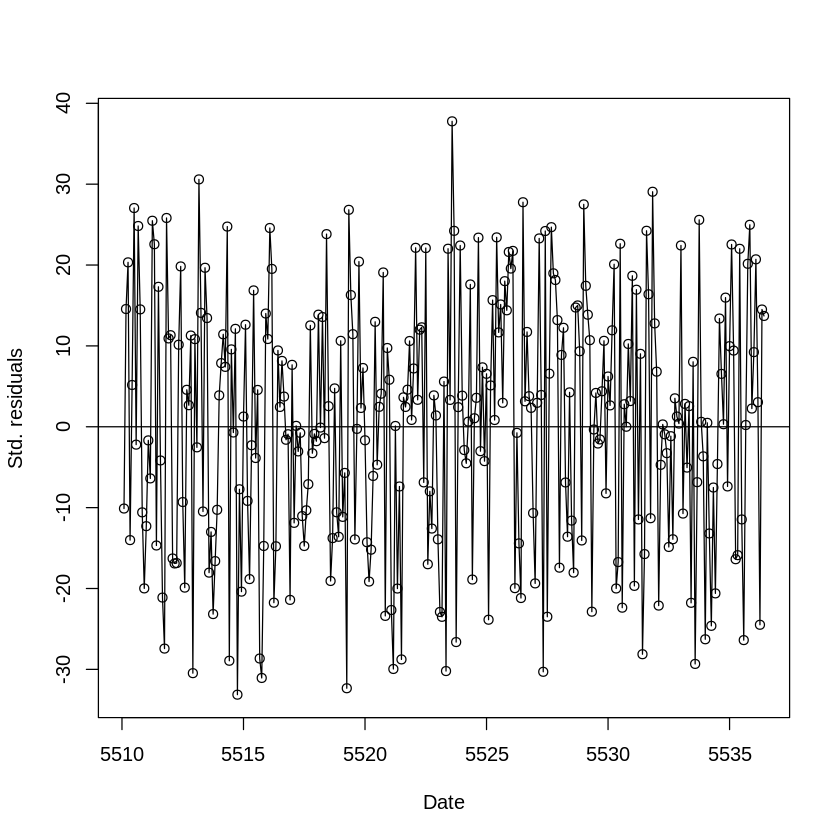

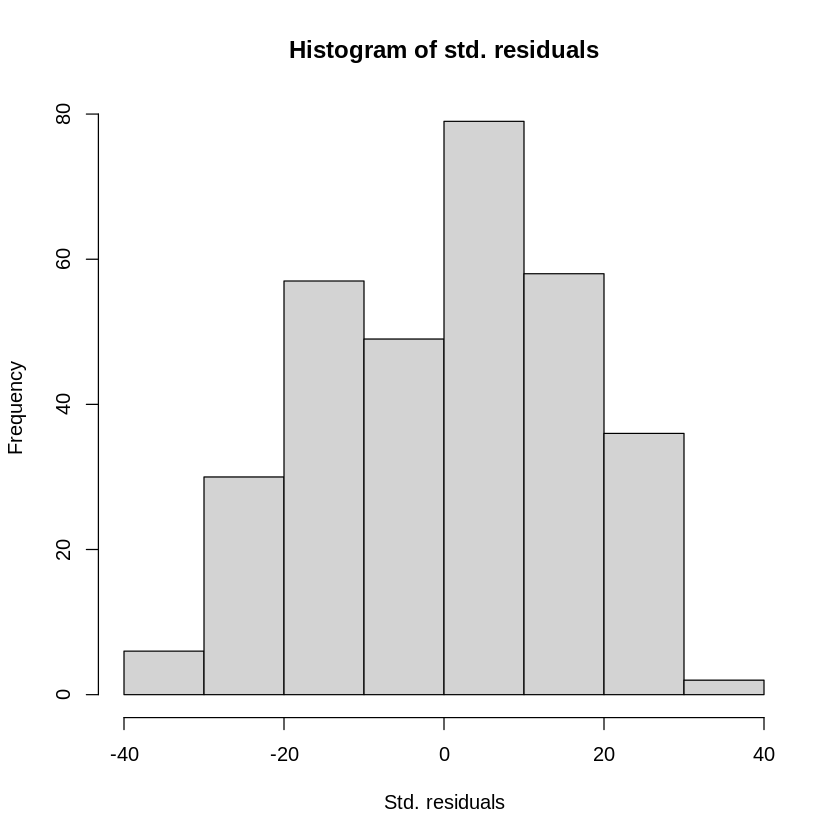


	Shapiro-Wilk normality test

data:  residuals_sarima
W = 0.98072, p-value = 0.0002909


$pvalue
[1] 0.199

$observed.runs
[1] 146

$expected.runs
[1] 157.7823

$n1
[1] 142

$n2
[1] 175

$k
[1] 0

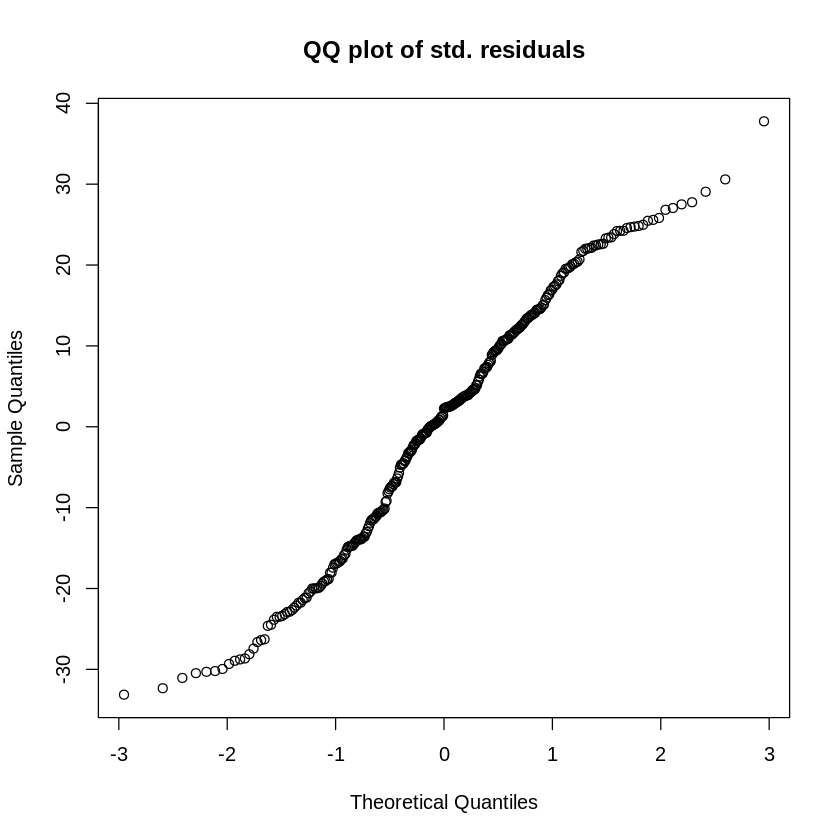

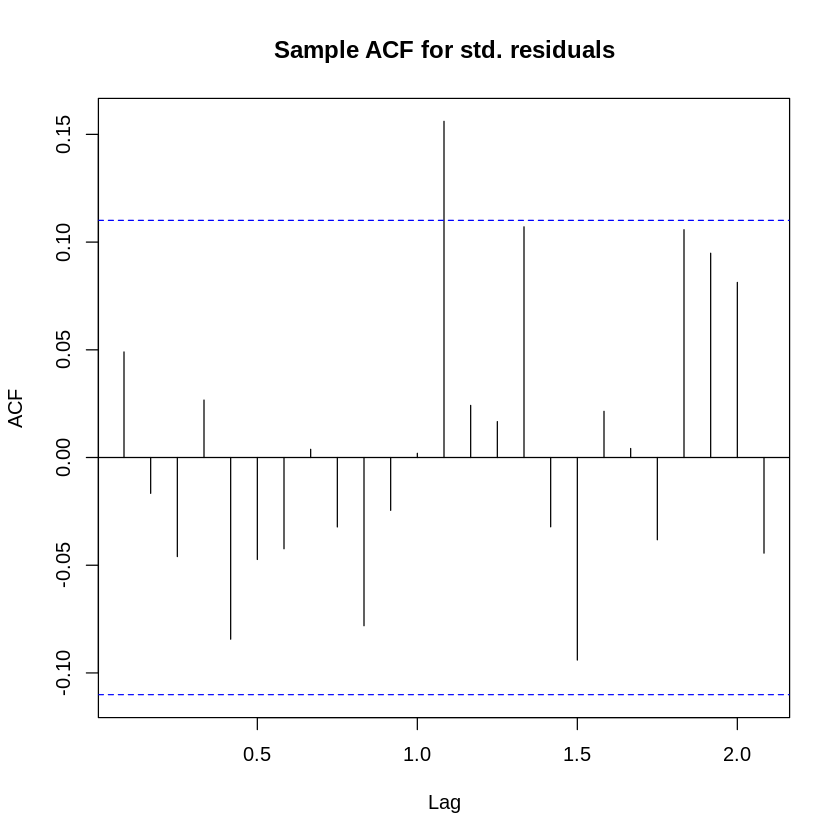

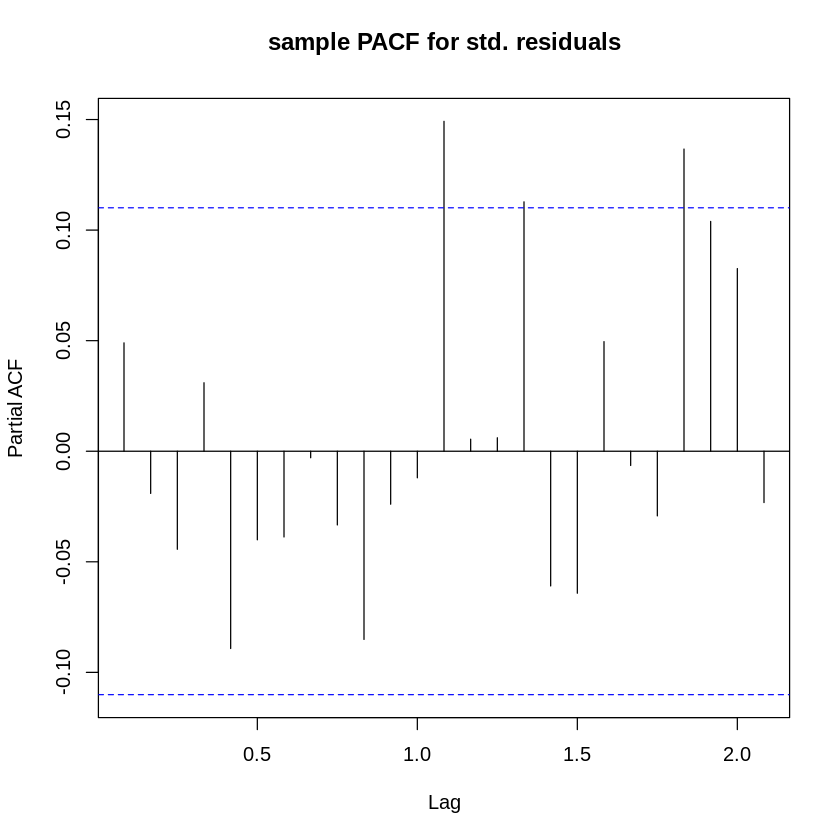

In [ ]:

residuals_sarima = residuals(sarima_model, type = "innovation")
summary(sarima_model)
# Plot the residuals
plot(residuals_sarima, ylab = "Std. residuals", xlab = "Date", type = "o")
abline(h = 0)

# Histogram of residuals
hist(residuals_sarima, main = "Histogram of std. residuals", xlab = "Std. residuals")

# QQ plot of residuals
qqnorm(residuals_sarima, main = "QQ plot of std. residuals")

# Shapiro-Wilk test for normality
shapiro.test(residuals_sarima)

# Runs test for randomness
runs(residuals_sarima)

# ACF plot for residuals
acf(residuals_sarima, main = "Sample ACF for std. residuals")
# PACF plot for residuals
pacf(residuals_sarima,main="sample PACF for std. residuals")



# **Discussion**
In this section, we explore the use of a Seasonal ARIMA (SARIMA) model for forecasting IPG2211A2N. The auto.arima function in R was used to automatically select the model parameters based on the differenced training data (diff_train_ts).

The identified model structure is SARIMA with differencing. This indicates that the data primarily benefits from differencing and a single moving average term (MA(1)) with a negative coefficient. The negative coefficient suggests the model corrects for past forecast errors.

# **In the Shapiro-Wilk normality test:**

The Shapiro-Wilk normality test was conducted to assess the normality of the residuals (residuals_sarima) from the fitted SARIMA model. The test statistic (W) of 0.98072 indicates a potential deviation from normality, as values closer to 1 suggest a greater likelihood of normality.  Furthermore, the p-value of 0.0002909 is highly significant, meaning we can reject the null hypothesis that the residuals are normally distributed at a common significance level (e.g., 0.05). This suggests a non-normal distribution for the residuals.
# **In the QQ plot :**
The visual inspection of the QQ plot for the model residuals further supports the conclusion from the Shapiro-Wilk test regarding non-normality. The data points  exhibit curvature downwards in the tails . This suggests that the residuals are not normally distributed. The specific pattern observed, where points fall below the line in the tails.
# **In the ACF plot :**

The ACF plot, which examines the autocorrelation of standardized residuals up to a lag of 20, reveals promising characteristics for model adequacy. The y-axis, ranging from -0.15 to 0.15, indicates a weak correlation between the residuals and their past values. This is further supported by the absence of any significant spikes at any lag. The lack of such spikes suggests that the residuals are close to white noise, meaning there's minimal linear dependence between the current residuals and their historical counterparts.  

# **In the PACF plot :**

Examining the PACF plot, which isolates the correlation at each lag by removing the influence of intervening lags, provides further reassurance regarding the adequacy of the chosen model. The plot focuses on the partial autocorrelation of standardized residuals up to lag 20. Similar to the ACF plot, the y-axis ranges from -0.15 to 0.15, signifying a weak correlation between the residuals and their lagged counterparts. The absence of any significant spikes across all lags is a key observation. This suggests there's minimal linear dependence between the current residual and its past values, even after accounting for correlations at intermediate lags.


# **Conclusion**

Based on the analysis of all models, the SARIMA with differencing emerged as the most suitable choice for forecasting IPG2211A2N. This model effectively addresses seasonality and captures short-term dependence in the data, resulting in potentially superior performance compared to other models considered. However, it's important to acknowledge that the Shapiro-Wilk test and QQ plot indicated non-normality in the residuals. Depending on the specific application's requirements, this non-normality might affect the confidence intervals of the forecasts. To address this potential limitation, future investigations could explore data transformations or alternative models like higher order ARIMA or GARCH models that don't rely on normality assumptions. Nonetheless, considering its ability to handle seasonality and its overall performance, the SARIMA model is a strong candidate for forecasting IPG2211A2N. We recommend proceeding with forecasting using this model while keeping the potential impact of non-normality in mind.

# **The forcasting**

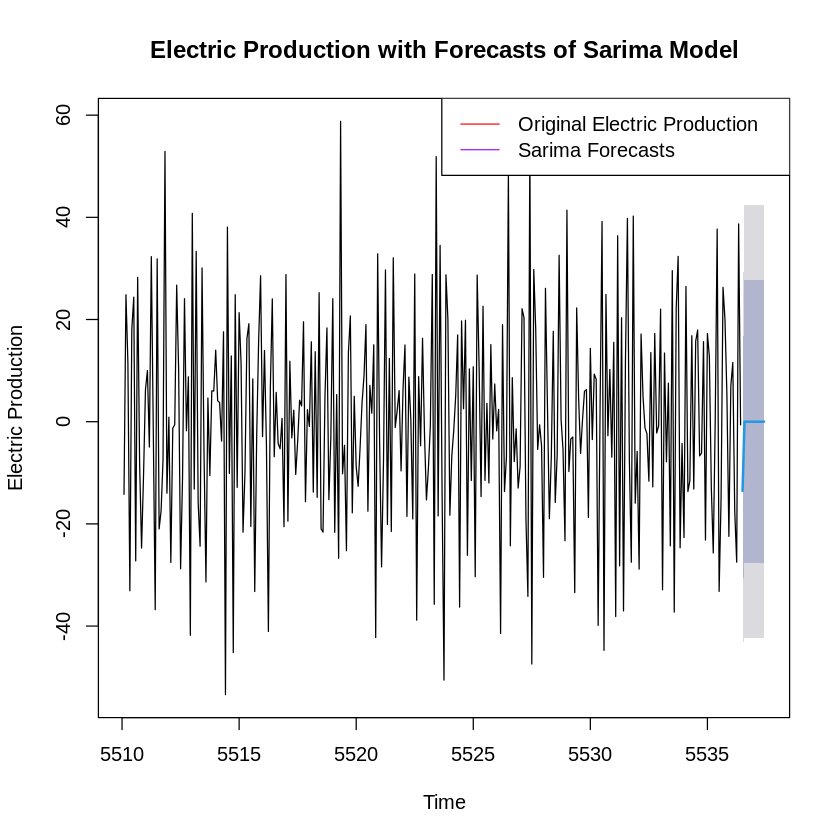

In [ ]:
# Number of future forecasted values (e.g., 12 months)
future_horizon = 12

# Define the differencing order used during model fitting (replace with your actual d value)
d = 1

# Generate forecasts using the fitted model
sarima_predictions <- forecast(sarima_model, h = future_horizon)

# Check if differencing was applied to testing data
if (d > 0) {
  # Reverse differencing on testing data (assuming additive differencing)
  inv_diff_test_ts <- diff(test_ts, lags = 1, signs = TRUE)  # Reverse differencing
  inv_diff_test_ts <- c(test_ts[1], inv_diff_test_ts)  # Add the first observation back
} else {
  # No differencing applied, use testing data directly
  inv_diff_test_ts <- test_ts
}

# Plotting the original time series and the forecasts (modify labels as needed)
plot(sarima_predictions, type ='l', xlab='Time', ylab ='Electric Production',
     main = 'Electric Production with Forecasts of Sarima Model')
lines(ts(inv_diff_test_ts, frequency = 7), col = "red")
legend("topright", legend=c('Original Electric Production', 'Sarima Forecasts'), col=c('red', 'purple'), lty=1)



# **Conclusion**
This project explored the use of time series analysis to forecast electricity production in the United States. We analyzed historical data from 1985 to 2018 and employed the SARIMA model to capture trends and seasonality within the data. While the model effectively identified these patterns in the training data, the forecasts for future production exhibited significant deviations from the actual values.

This discrepancy suggests potential limitations in the model's ability to generalize to unseen data. One possibility is that the model may have overfit the training data, capturing noise instead of the underlying trends. Additionally, the SARIMA model assumes a linear relationship, which might not fully capture the complexities of electricity production, potentially influenced by non-linear factors.

Despite these limitations, the project demonstrates the value of time series analysis in understanding historical electricity production patterns. The insights gained from analyzing trends and seasonality can be valuable for various stakeholders.

Moving forward, exploring alternative forecasting models, such as those suited for non-linear relationships, could improve the accuracy of future predictions. Additionally, incorporating data on external factors that might influence electricity production, such as weather patterns or economic trends, could further enhance the model's capabilities.

This project establishes a foundation for further exploration of electricity production forecasting in the US. By addressing the limitations identified here and incorporating more comprehensive data, future research can develop more robust and accurate forecasting models to inform energy planning and decision-making.